# Ветвящиеся процессы #
Работа выполнена студентом группы 23КНТ2 ИМИКН ВШЭ НН ***Власовым Артёмом Дмитриевичем***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

np.random.seed(seed=42)

In [2]:
df = pd.read_excel('Великобритания.xlsx', sheet_name='Sheet1')
df.head()

,Страна,Дата,Заражений,Выздоровлений,Смертей,Заражений за день,Выздоровлений за день,Смертей за день,Население страны,Тестов,Тестов за день
0,Великобритания,20.07.2020,296940,1413.0,41090,586,0.0,10,63181775,8256935,121693
1,Великобритания,21.07.2020,297385,1414.0,41115,445,1.0,25,63181775,8388397,131462
2,Великобритания,22.07.2020,297948,1416.0,41132,563,2.0,17,63181775,8522679,134282
3,Великобритания,23.07.2020,298727,1425.0,41141,779,9.0,9,63181775,8663993,141314
4,Великобритания,24.07.2020,299495,1425.0,41173,768,0.0,32,63181775,8798036,134043


In [3]:
df.tail()

,Страна,Дата,Заражений,Выздоровлений,Смертей,Заражений за день,Выздоровлений за день,Смертей за день,Население страны,Тестов,Тестов за день
604,Великобритания,16.03.2022,20059641,NaN,163833,93943,NaN,153,63181775,476632060,853716
605,Великобритания,17.03.2022,20150847,NaN,163972,91206,NaN,139,63181775,477378853,746793
606,Великобритания,18.03.2022,20243940,NaN,164099,93093,NaN,127,63181775,477950504,571651
607,Великобритания,19.03.2022,20243940,NaN,164099,0,NaN,0,63181775,478578610,628106
608,Великобритания,20.03.2022,20243940,NaN,164099,0,NaN,0,63181775,0,0


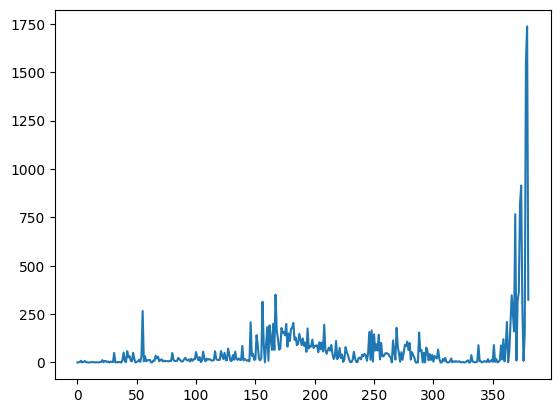

In [4]:
plt.plot(df.index, df['Выздоровлений за день'])
plt.show()

# Работаем с пропущенными значениями c использованием алгоритмов машинного обучения
Как мы видим, начиная с 381 строки в столбцах **'Выздоровлений за день'** и **'Выздоровлений'** вместо данных идут пропуски. Используем Random Forest Regressor, чтобы обучить на первых 300+ строках, а затем предсказать недостающие значения.

Перейдём к следующим шагам:

1. Построим модель случайного леса по непустым данным.

2. Применим её к строкам с пропущенными значениями.

3. Заполним пропуски предсказаниями модели.

In [5]:
from sklearn.ensemble import RandomForestRegressor

def fill_daily_recovered(df):
    """
    Заполнение ежедневных выздоровлений через регрессию
    """

    df['Индекс_дня'] = df.index

    known = df[df['Выздоровлений за день'].notna()]

    X = known[['Индекс_дня', 'Тестов за день']].values
    y = known['Выздоровлений за день'].values

    # Обучаем модель
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)

    all_X = df[['Индекс_дня', 'Тестов за день']].values
    predicted = model.predict(all_X)

    filled = df['Выздоровлений за день'].where(
        df['Выздоровлений за день'].notna(),
        np.round(predicted).clip(min=0)
    )
    return filled.astype(int)

Заполняем пропуски

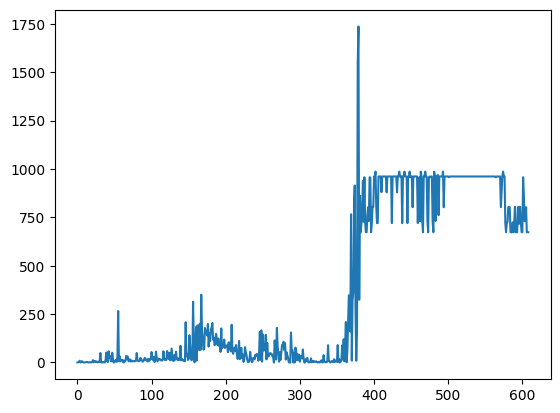

In [6]:
df['Выздоровлений за день'] = fill_daily_recovered(df)

plt.plot(df.index, df['Выздоровлений за день'])
plt.show()

Вычисляем значения для столбца 'Выздоровлений' начиная с 381 строки, поскольку там тоже пропуски, но зная изначальное выздоровлений и все данные о выздоровлениях в день мы можем всё вычислить

In [7]:
start_index = 381

for i in range(start_index, len(df)):
    df.loc[i, 'Выздоровлений'] = df.loc[i-1, 'Выздоровлений'] + df.loc[i, 'Выздоровлений за день']

In [8]:
# Проверяем, нет ли пустых значений
df[df["Выздоровлений"].isnull()]

,Страна,Дата,Заражений,Выздоровлений,Смертей,Заражений за день,Выздоровлений за день,Смертей за день,Население страны,Тестов,Тестов за день,Индекс_дня


Удаляем столбец **'Страна'**, **'Тестов'**, **'Тестов за день''**, **'Смертей за день'** и **'index'** поскольку они не несут никакой полезной информации для следующих заданий

In [9]:
df.drop(columns=['Страна'], inplace=True)
df.drop(columns=['Тестов'], inplace=True)
df.drop(columns=['Тестов за день'], inplace=True)
df.drop(columns=['Индекс_дня'], inplace=True)
df.head()

,Дата,Заражений,Выздоровлений,Смертей,Заражений за день,Выздоровлений за день,Смертей за день,Население страны
0,20.07.2020,296940,1413.0,41090,586,0,10,63181775
1,21.07.2020,297385,1414.0,41115,445,1,25,63181775
2,22.07.2020,297948,1416.0,41132,563,2,17,63181775
3,23.07.2020,298727,1425.0,41141,779,9,9,63181775
4,24.07.2020,299495,1425.0,41173,768,0,32,63181775
